In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Hitters_Adjusted_Salary.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15023 entries, 0 to 15022
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15023 non-null  int64  
 1   yearID      15023 non-null  int64  
 2   playerID    15023 non-null  object 
 3   salary      15023 non-null  int64  
 4   ADJ Salary  15023 non-null  float64
 5   GS          15023 non-null  float64
 6   InnOuts     15023 non-null  float64
 7   PO          15023 non-null  int64  
 8   A           15023 non-null  int64  
 9   E           15023 non-null  float64
 10  DP          15023 non-null  int64  
 11  teamID      15023 non-null  object 
 12  lgID        15023 non-null  object 
 13  G           15023 non-null  int64  
 14  AB          15023 non-null  int64  
 15  R           15023 non-null  int64  
 16  H           15023 non-null  int64  
 17  2B          15023 non-null  int64  
 18  3B          15023 non-null  int64  
 19  HR          15023 non-nul

In [4]:
df.sample(100)

,Unnamed: 0,yearID,playerID,salary,ADJ Salary,GS,InnOuts,PO,A,E,DP,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
12708,12708,2012,parrage01,502000,5.658820e+05,90.0,2525.0,189,8,4.0,1,ARI,NL,133,385,58,105,21,2,7,36.0,15.0,9.0,33,77.0,4.0,4.0,6.0,2.0,4.0
2137,2137,1990,saboch01,200000,3.960383e+05,144.0,3807.0,70,273,12.0,17,CIN,NL,148,567,95,153,38,2,25,71.0,25.0,10.0,61,58.0,7.0,4.0,1.0,3.0,8.0
778,778,1987,nettlgr01,219500,5.000794e+05,25.0,792.0,61,56,3.0,13,ATL,NL,112,177,16,37,8,1,5,33.0,1.0,0.0,22,25.0,4.0,0.0,0.0,2.0,6.0
14188,14188,2015,sanchca01,510000,5.568951e+05,112.0,2989.0,229,268,5.0,83,CHA,AL,120,389,40,87,23,1,5,31.0,2.0,2.0,19,81.0,0.0,5.0,6.0,1.0,9.0
13823,13823,2014,hamiljo03,17000000,1.858520e+07,74.0,2006.0,169,3,5.0,1,LAA,AL,89,338,43,89,21,0,10,44.0,3.0,3.0,32,108.0,5.0,5.0,0.0,6.0,2.0
3603,3603,1993,bruetjt01,121000,2.167206e+05,3.0,135.0,12,0,2.0,0,MIN,AL,17,20,2,5,2,0,0,1.0,0.0,0.0,1,4.0,0.0,1.0,0.0,0.0,1.0
4856,4856,1995,manwaki01,1800000,3.056823e+06,114.0,2915.0,607,55,7.0,10,SFN,NL,118,379,21,95,15,2,4,36.0,1.0,0.0,27,72.0,6.0,10.0,4.0,4.0,8.0
4498,4498,1995,espinal01,450000,7.642057e+05,34.0,1096.0,50,101,5.0,17,CLE,AL,66,143,15,36,4,0,2,17.0,0.0,2.0,2,16.0,0.0,1.0,2.0,2.0,3.0
10613,10613,2007,germaes01,423000,5.280023e+05,83.0,2225.0,105,157,9.0,33,KCA,AL,121,348,49,92,15,6,4,37.0,11.0,7.0,43,60.0,0.0,5.0,6.0,3.0,11.0
12739,12739,2012,roberbr01,10000000,1.127255e+07,17.0,447.0,30,48,1.0,9,BAL,AL,17,66,2,12,0,0,0,5.0,1.0,1.0,5,12.0,0.0,0.0,1.0,2.0,0.0


In [5]:
df.columns

Index(['Unnamed: 0', 'yearID', 'playerID', 'salary', 'ADJ Salary', 'GS', 'InnOuts', 'PO', 'A', 'E', 'DP', 'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP'], dtype='object')

In [6]:
df = df.drop(["Unnamed: 0"], axis=1)

In [7]:
df["ADJ Salary"] = df["ADJ Salary"].astype(int).round()

In [8]:
df["ADJ Salary"].value_counts()

185107      93
198019      92
310697      86
269925      76
195227      75
            ..
10161904     1
10345815     1
5716071      1
5689607      1
23436394     1
Name: ADJ Salary, Length: 6766, dtype: int64

In [9]:
# Drop object fields

df = df.drop(["yearID", "playerID", "salary",  "teamID", "lgID"], axis=1)

In [10]:
# Drop fielding stat columns

df = df.drop(["PO", "A", "E",  "DP"], axis=1)

In [11]:
# Eliminate rookies

df = df.loc[(df["AB"] > 130), :]

In [12]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11080 entries, 0 to 11079
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ADJ Salary  11080 non-null  int32  
 1   GS          11080 non-null  float64
 2   InnOuts     11080 non-null  float64
 3   G           11080 non-null  int64  
 4   AB          11080 non-null  int64  
 5   R           11080 non-null  int64  
 6   H           11080 non-null  int64  
 7   2B          11080 non-null  int64  
 8   3B          11080 non-null  int64  
 9   HR          11080 non-null  int64  
 10  RBI         11080 non-null  float64
 11  SB          11080 non-null  float64
 12  CS          11080 non-null  float64
 13  BB          11080 non-null  int64  
 14  SO          11080 non-null  float64
 15  IBB         11080 non-null  float64
 16  HBP         11080 non-null  float64
 17  SH          11080 non-null  float64
 18  SF          11080 non-null  float64
 19  GIDP        11080 non-nul

array([[<AxesSubplot:title={'center':'ADJ Salary'}>,
        <AxesSubplot:title={'center':'GS'}>,
        <AxesSubplot:title={'center':'InnOuts'}>,
        <AxesSubplot:title={'center':'G'}>],
       [<AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'2B'}>],
       [<AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'RBI'}>,
        <AxesSubplot:title={'center':'SB'}>],
       [<AxesSubplot:title={'center':'CS'}>,
        <AxesSubplot:title={'center':'BB'}>,
        <AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'IBB'}>],
       [<AxesSubplot:title={'center':'HBP'}>,
        <AxesSubplot:title={'center':'SH'}>,
        <AxesSubplot:title={'center':'SF'}>,
        <AxesSubplot:title={'center':'GIDP'}>]], dtype=object)

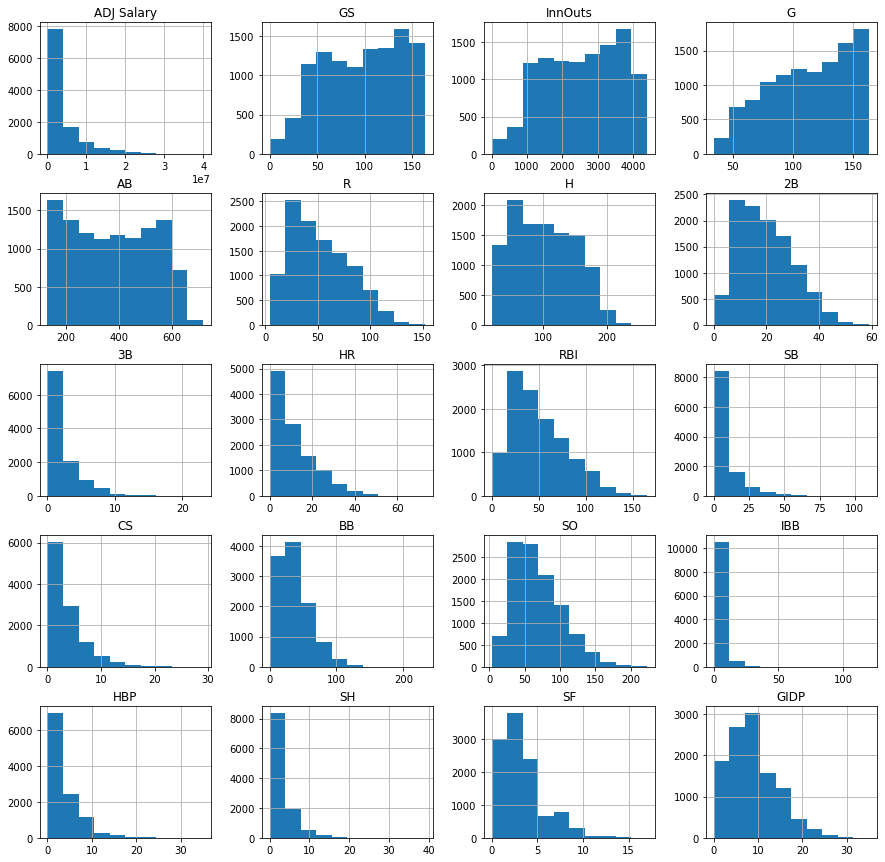

In [13]:
df.hist(figsize = (15, 15))  

In [14]:
def run_regression(a_df, salary_col_name="ADJ Salary"):

    # Assign X and y

    X = a_df.drop([salary_col_name], axis=1)
    y = a_df[salary_col_name]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LinearRegression().fit(X_train_scaled, y_train)
    
    predicted = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 
    
    # Score the model

    print(f"Linear Regression Training Data Score: {model.score(X_train_scaled, y_train)}")
    print(f"Linear Regression Testing Data Score: {model.score(X_test_scaled, y_test)}")  
    
    plt.bar(np.arange(len(model.coef_)), model.coef_)
    plt.title(f'Linear Regression coefficient plot')
    plt.show()  

MSE: 17252847410432.098
R2: 0.2626770265394699
Linear Regression Training Data Score: 0.2620258358190851
Linear Regression Testing Data Score: 0.2626770265394699


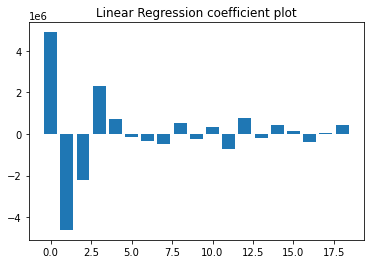

In [15]:
run_regression(df, "ADJ Salary")

In [16]:
df = df.loc[(df["ADJ Salary"] > 0), :]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11079 entries, 0 to 11079
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ADJ Salary  11079 non-null  int32  
 1   GS          11079 non-null  float64
 2   InnOuts     11079 non-null  float64
 3   G           11079 non-null  int64  
 4   AB          11079 non-null  int64  
 5   R           11079 non-null  int64  
 6   H           11079 non-null  int64  
 7   2B          11079 non-null  int64  
 8   3B          11079 non-null  int64  
 9   HR          11079 non-null  int64  
 10  RBI         11079 non-null  float64
 11  SB          11079 non-null  float64
 12  CS          11079 non-null  float64
 13  BB          11079 non-null  int64  
 14  SO          11079 non-null  float64
 15  IBB         11079 non-null  float64
 16  HBP         11079 non-null  float64
 17  SH          11079 non-null  float64
 18  SF          11079 non-null  float64
 19  GIDP        11079 non-nul

In [18]:
df["log_salary"] = np.log(df["ADJ Salary"])

MSE: 6548603010757.381
R2: 0.7195987655200791
Linear Regression Training Data Score: 0.7159571058981656
Linear Regression Testing Data Score: 0.7195987655200791


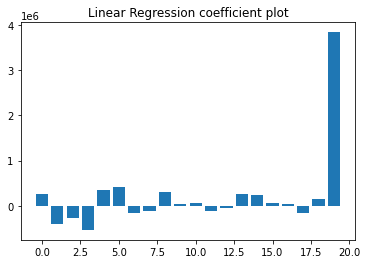

In [19]:
run_regression(df, "ADJ Salary")

MSE: 0.48195929329559234
R2: 0.7238446146442232
Linear Regression Training Data Score: 0.7258688597704046
Linear Regression Testing Data Score: 0.7238446146442232


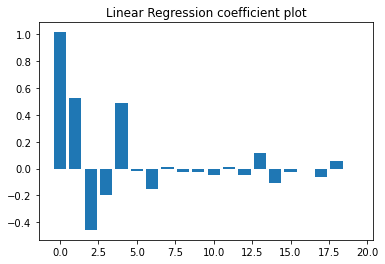

In [20]:
run_regression(df, "log_salary")

# Results:

- poor scores on simple linear regression with unaltered continuous numeric data
- took log of ADJ Salary, and scores improved dramatically
- things to try: add calculated fields (batting avg, obp, slugging)

In [21]:
df["bat_avg"] = (df["H"] + df["2B"] + df["3B"] + df["HR"]) / df["AB"]

In [22]:
df["slg_per"] = (df["H"] + 2*df["2B"] + 3*df["3B"] + 4*df["HR"]) / df["AB"]

In [23]:
df["on_base_per"] = (df["H"] + df["BB"] + df["HBP"]) / (df["AB"] + df["BB"] + df["HBP"] + df["SF"])

In [24]:
df["plate_app"] = df["AB"] + df["BB"] + df["HBP"] + df["SH"] + df["SF"]

MSE: 6535257058342.015
R2: 0.7201702189318115
Linear Regression Training Data Score: 0.7160236326730227
Linear Regression Testing Data Score: 0.7201702189318115


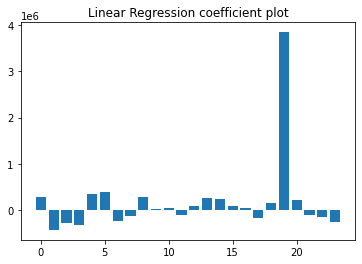

In [25]:
run_regression(df, "ADJ Salary")

MSE: 0.48128068331529067
R2: 0.7242334478988639
Linear Regression Training Data Score: 0.7261311599317759
Linear Regression Testing Data Score: 0.7242334478988639


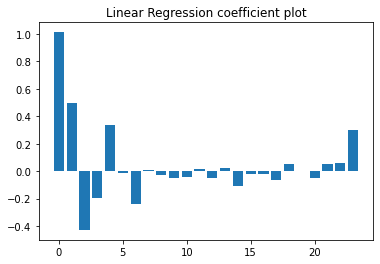

In [26]:
run_regression(df, "log_salary")

In [27]:
def run_LASSO(a_df):
    """ Runs LASSO regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_salary"], axis=1)
    y = a_df["log_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    lasso_reg = Lasso().fit(X_train, y_train)

    predicted = lasso_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"LASSO Regression Training Data Score: {lasso_reg.score(X_train_scaled, y_train)}")
    print(f"LASSO Regression Testing Data Score: {lasso_reg.score(X_test_scaled, y_test)}")
    
    plt.bar(np.arange(len(lasso_reg.coef_)), lasso_reg.coef_)
    plt.title(f'LASSO Regression coefficient plot')
    plt.show()  
    
    sel = SelectFromModel(lasso_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=Lasso())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)
    
    new_lasso_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    
    importance = np.abs(new_lasso_reg.coef_)
    feature_names = np.array(X.columns)
    
    plt.bar(height=importance, x=feature_names)
    plt.title("Feature importances via coefficients")
    plt.show()
    
    print(f"New linear regression score: {new_lasso_reg.score(X_selected_test_scaled, y_test)}")

In [28]:
def run_Ridge(a_df):
    """ Runs Ridge regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_salary"], axis=1)
    y = a_df["log_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ridge_reg = Ridge().fit(X_train, y_train)

    predicted = ridge_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"Ridge Regression Training Data Score: {ridge_reg.score(X_train_scaled, y_train)}")
    print(f"Ridge Regression Testing Data Score: {ridge_reg.score(X_test_scaled, y_test)}")

    plt.bar(np.arange(len(ridge_reg.coef_)), ridge_reg.coef_)
    plt.title(f'Ridge Regression coefficient plot')
    plt.show()     
    
    sel = SelectFromModel(ridge_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=Ridge())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)

    new_ridge_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    
    importance = np.abs(new_ridge_reg.coef_)
    feature_names = np.array(X.columns)
    
    plt.bar(height=importance, x=feature_names)
    plt.title("Feature importances via coefficients")
    plt.show()
    
    print(f"New linear regression score: {new_ridge_reg.score(X_selected_test_scaled, y_test)}")

In [29]:
def run_ElasticNet(a_df):
    """ Runs ElasticNet regression on dataframe, prints model scores """

    # Assign X and y

    X = a_df.drop(["log_salary"], axis=1)
    y = a_df["log_salary"]
    
    # Split the data into X_train, X_test, y_train, y_test

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    # Create a scaler to standardize the data

    scaler = StandardScaler()

    # Train the scaler with the X_train data.

    scaler.fit(X_train)

    # Transform X_train and X_test.

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    elasticnet_reg = ElasticNet().fit(X_train, y_train)
      
    predicted = elasticnet_reg.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predicted)
    r2 = r2_score(y_test, predicted)
    
    print(f"MSE: {mse}")
    print(f"R2: {r2}") 

    # Score the model

    print(f"ElasticNet Regression Training Data Score: {elasticnet_reg.score(X_train_scaled, y_train)}")
    print(f"ElasticNet Regression Testing Data Score: {elasticnet_reg.score(X_test_scaled, y_test)}")
    
    plt.bar(np.arange(len(elasticnet_reg.coef_)), elasticnet_reg.coef_)
    plt.title(f'ElasticNet Regression coefficient plot')
    plt.show()  
    
    sel = SelectFromModel(elasticnet_reg)
    sel.fit(X_train_scaled, y_train)
    SelectFromModel(estimator=ElasticNet())
    
    X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
    
    scaler = StandardScaler().fit(X_selected_train)
    
    X_selected_train_scaled = scaler.transform(X_selected_train)
    X_selected_test_scaled = scaler.transform(X_selected_test)

    new_elasticnet_reg = LinearRegression().fit(X_selected_train_scaled, y_train)
    
    importance = np.abs(new_elasticnet_reg.coef_)
    feature_names = np.array(X.columns)
    
    plt.bar(height=importance, x=feature_names)
    plt.title("Feature importances via coefficients")
    plt.show()
    
    print(f"New linear regression score: {new_elasticnet_reg.score(X_selected_test_scaled, y_test)}")

MSE: 3.024646870574391
R2: -0.7330769086266613
LASSO Regression Training Data Score: -0.7438231724527566
LASSO Regression Testing Data Score: -0.7330769086266613


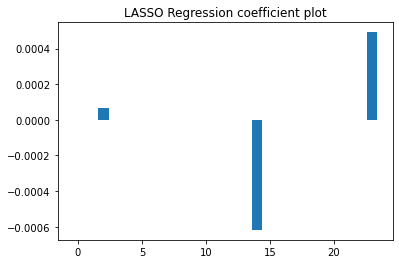

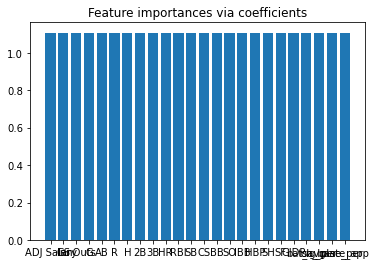

New linear regression score: 0.7021337563241894


In [30]:
run_LASSO(df)

MSE: 3.201890324657189
R2: -0.8346347269837484
Ridge Regression Training Data Score: -0.8256196314518096
Ridge Regression Testing Data Score: -0.8346347269837484


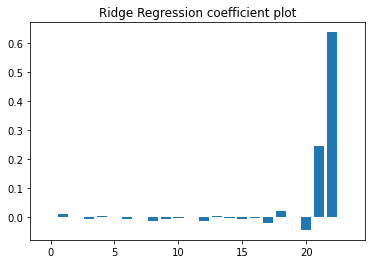

ValueError: shape mismatch: objects cannot be broadcast to a single shape

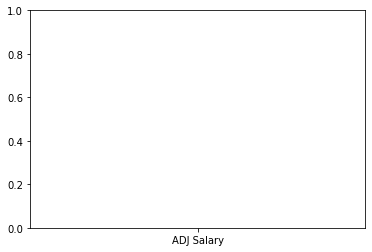

In [31]:
run_Ridge(df)

MSE: 2.756501555900191
R2: -0.579433699054221
ElasticNet Regression Training Data Score: -0.5881402479534035
ElasticNet Regression Testing Data Score: -0.579433699054221


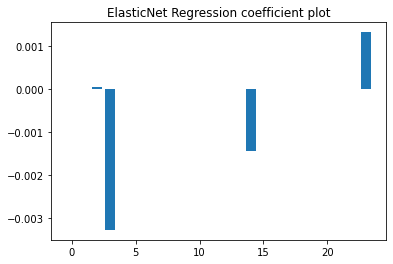

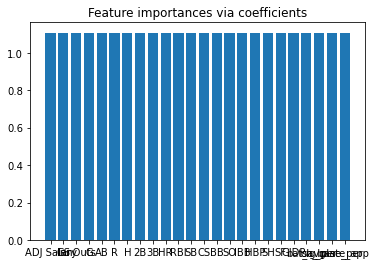

New linear regression score: 0.7021337563241894


In [32]:
run_ElasticNet(df)

In [34]:
a_df = df.copy()

# Drop object fields

# a_df = a_df.drop(["yearID", "playerID", "salary",  "teamID", "lgID"], axis=1)

X = a_df.drop(["ADJ Salary"], axis=1)
y = a_df["ADJ Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [35]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()   

In [36]:
test_model(LinearRegression(), data)

Model: LinearRegression
Train score: 0.7175313968427447
Test Score: 0.7150679418996142

